<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Load text files from a directory<br/>and create WordClouds for the whole and each file</h1>
    <p class="lead">Example on how to load the full text from Text files stored in a certain local directory or from a file downloaded from a URL.</p>
  </div>
</div>

### In this Notebook:

 * Read the list of text files from local directory;
 * Load the contents of the several text files into a List;
 * Build a Word Cloud from it and from the individual files -- to see the outputs properly (last Word Clouds), please access [NBViewer](https://nbviewer.jupyter.org/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/DataBL/CMTaylorKeyloggingData/DataBL_CMTaylorKeyloggingData_read_text_files.ipynb).
 

    
#### Notes:

    * If using BINDER or a did a git clone to your Jupyter Notebook LOCAL SERVER, if you want to clean the output from the previous run, from the main menu, choose "Kernel" > "Restart and Clear Output"


In [2]:
# Load the necessary modules / Libraries:

import os
import re

### Let's check the files in this Directory:

In [4]:
#this will locate all the TXT files inside the main Directory and any sub-Folder if they exist:

path_to_files = 'data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/'

txt_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(path_to_files)
             for name in files
             if name.endswith((".txt"))] #If we needed to read several files extensions: if name.endswith((".ext1", ".ext2"))

print('Number of TXT files ready to be loaded: ' + str(len(txt_files)))


Number of TXT files ready to be loaded: 10


In [5]:
print('Path to the first file: '+txt_files[0])
print('Path to the last file: '+txt_files[len(txt_files)-1])

Path to the first file: data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files001.txt
Path to the last file: data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files026.txt


### Let's check one of these:

In [6]:
f = open(txt_files[5], "r")
print(f.read())

Keystrokes Typed

Application: Soffice
Start: 31/01/2015 14:27:40
Title: Book Nine.odt - OpenOffice.org Writer


 [Book Nine.odt - OpenOffice.org Writer]
<14:27>
<UP:114><DOWN:12>h<DOWN:8><UP:2><RIGHT:12>in <DELETE:17><DOWN><LEFT:56><RIGHT:3>
     <RIGHT:77>. And - oh yeah - s<RIGHT:16><LEFT:2> alright<LEFT:14><DOWN:5><UP><LEFT:22><DOWN:9><LEFT:14><UP:5><DOWN><RIGHT:6><LEFT><RIGHT><LEFT:2><DOWN:9><UP><DOWN><RIGHT:10> then.<DELETE><DOWN><RIGHT:18><DOWN><LEFT><DOWN><UP><RIGHT><LEFT>.<DOWN:5><UP:3><RIGHT:21>'
     'What.<DOWN>
<UP><DOWN><LEFT>?<DOWN><UP><RIGHT>     <UP><RIGHT:6> You're brave.'
     'I'm not Ems.'
     You wil be<LEFT:3>l<RIGHT:3>.<DOWN:5><UP:4><RIGHT:11><LEFT:2>,<DOWN:3><LEFT:17><RIGHT:2>T<RIGHT:52><LEFT:2>T<DOWN:3><LEFT:11><RIGHT>We <DOWN:2><UP:2><RIGHT:7><LEFT>L<DOWN:2><UP><RIGHT:29><DOWN><LEFT><UP><RIGHT:30><LEFT:39>Lukey moan <RIGHT:3>n<RIGHT:9><LEFT><RIGHT:11><LEFT>.<DELETE:34><RIGHT:68><LEFT>and <DELETE:5><RIGHT:9><DOWN><LEFT:3><DOWN><LEFT><DOWN><UP:4><DOWN:3><LEFT:

### Let's load all of them into a list of documents, extracting only the text (excluding all the commands)

In [7]:
list_of_documents=[]

for i in range (len(txt_files)):
    f = open(txt_files[i], "r")
    raw = f.read()
    # append the text only, excluding all the recorded commands (that are limited by "<" and ">", e.g. "<DELETE:5>", "<CTRL+S>")
    list_of_documents.append(re.sub(r'<.+?>', '', raw))    

In [9]:
#Exclude Stop_Words:

STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves", "odt", "openoffice.org","openoffice","soffice","org","writer","ntitle","nttart", "keystrokes", "typed","writer]","napplication"])

In [12]:
# ONLY run this once, if wordcloud is not installed
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 9.4 MB/s eta 0:00:00


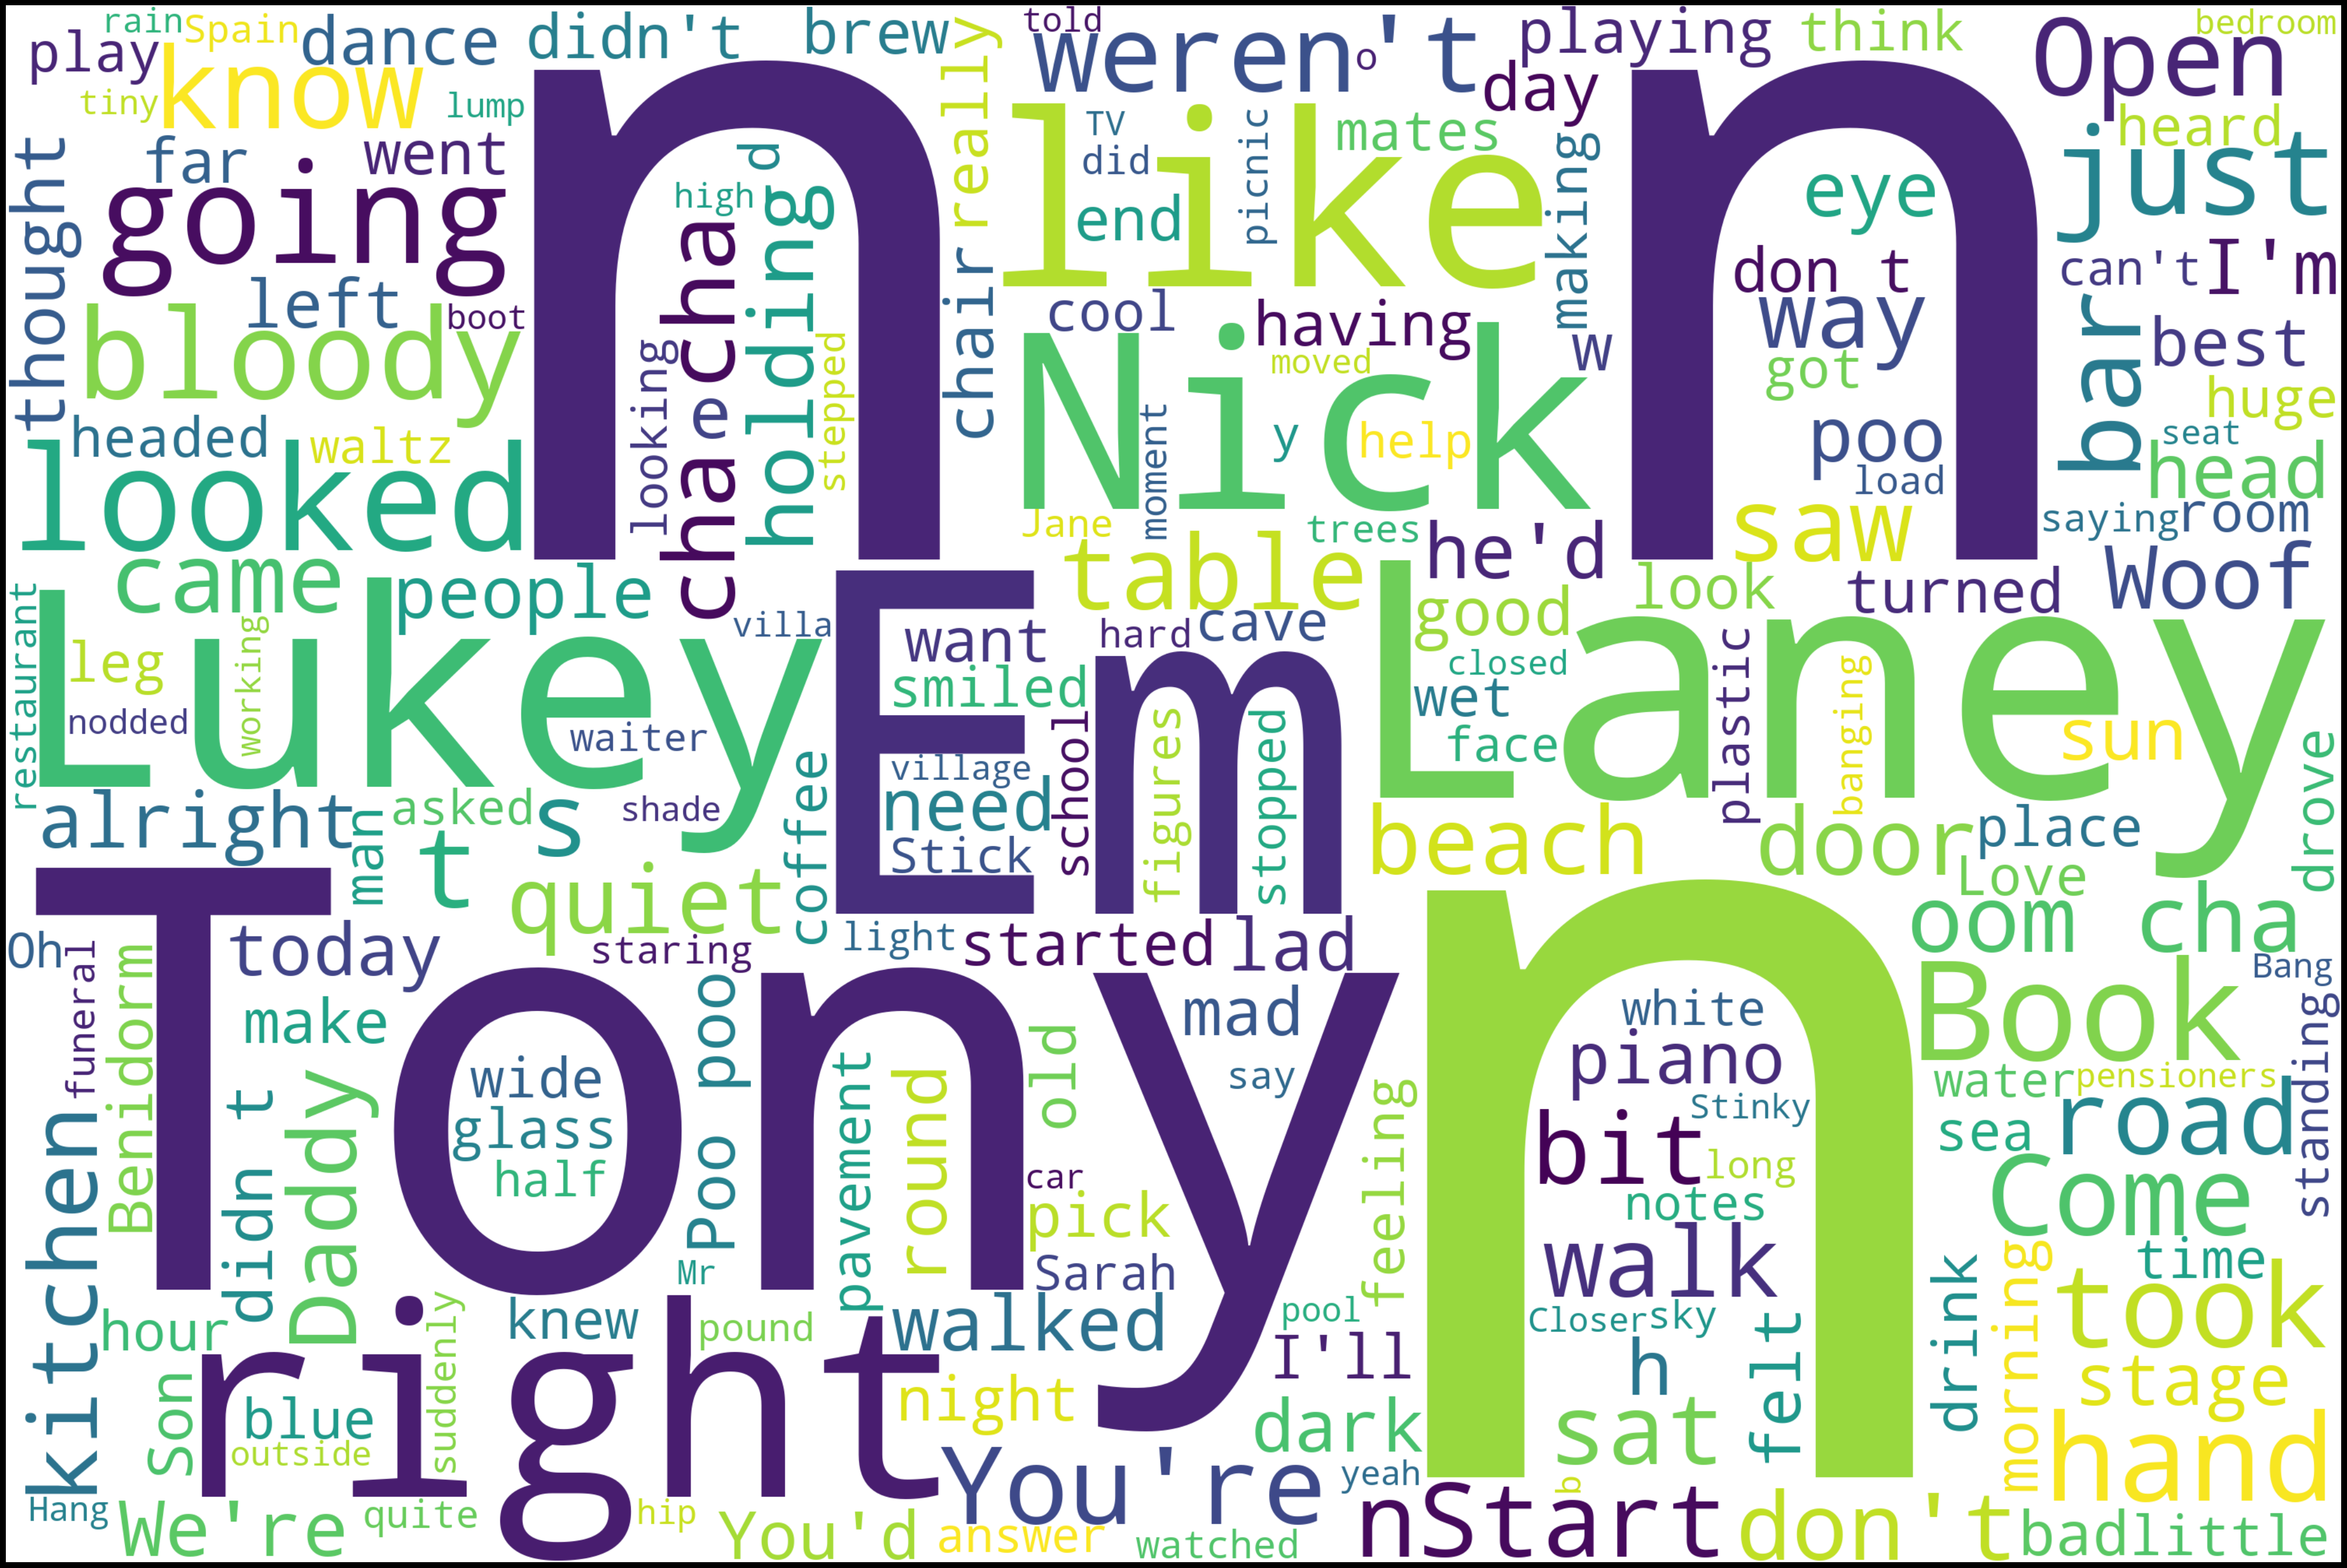

In [10]:
#from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOP_WORDS).generate(str(list_of_documents))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Using a simpler one, without stop words:

In [11]:
# Generate a Word Cloud of the top 20 Places of Publication
# !pip install git+https://git@github.com/liamgh/word_cloud.git

from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML

wc=WordCloud()
embed_code=wc.get_embed_code(text=list_of_documents,random_color=True,topn=100)
HTML(embed_code)

#### ... and with stop words

In [13]:
# initialize WordCloud
wc=WordCloud(stopwords=list(STOP_WORDS))
embed_code=wc.get_embed_code(text=list_of_documents,random_color=True,topn=100)
HTML(embed_code)

## And by file / day

In [17]:
"""

Let's define a function and call it with the day index for each day

"""

def WordCloudByDay(dayIndex):
  print(txt_files[dayIndex])
  f = open(txt_files[dayIndex], "r")
  list_of_documents=[]
  list_of_documents.append(re.sub(r'<.+?>', '', f.read()))
  wc=WordCloud(stopwords=list(STOP_WORDS))
  embed_code=wc.get_embed_code(text=list_of_documents,random_color=True,topn=100)
  return embed_code

### 07/01/2015 12:03:06

In [18]:
i = 7

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files020.txt


#### Let's check why we got this word cloud -- the text extracted after excluding all the commands (between "<" and ">", like "< DELETE >" (without the spaces)):

In [19]:
print(list_of_documents[0])

Keystrokes Typed

Application: Soffice
Start: 04/02/2015 12:17:15
Title: Book Nine.odt - OpenOffice.org Writer


 [Book Nine.odt - OpenOffice.org Writer]

When he came too iat the piano but she was not yet playing it.  werelady in a cardy and an  with slicked-back hair.
      Bheld 
sMany other old people 
s eyes in their handsglass of water was at his lips.
     'Come on Tony, drink that.' Em was holding the glass. She were sat nect to him in a fushcia plastic chair. Laney were xsat opposite him, other side of beige formica table.  his right i Nick were sat to Tony's left. Lukey were under the table, curled round the chrome single   column.
     'Woof woof,' said Lukey.
     'Woof woof,' said Tony.
     'Come on Tony, drink up.'
     'You alright, Love?' said Laney looking over to the stage as the piano sprung to life.
     'She's not really going to play that thig is she?'n
     'Why not?'
      said Em.
     The pianist broke into a rhythm - oom cha cha, oom cha cha.
     'She's pla

### 09/01/2015 09:22:20

In [20]:
i = 3

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files010.txt


#### Let's confirm with the text extracted from the file:

In [21]:
print(list_of_documents[0])

Keystrokes Typed

Application: Soffice
Start: 04/02/2015 12:17:15
Title: Book Nine.odt - OpenOffice.org Writer


 [Book Nine.odt - OpenOffice.org Writer]

When he came too iat the piano but she was not yet playing it.  werelady in a cardy and an  with slicked-back hair.
      Bheld 
sMany other old people 
s eyes in their handsglass of water was at his lips.
     'Come on Tony, drink that.' Em was holding the glass. She were sat nect to him in a fushcia plastic chair. Laney were xsat opposite him, other side of beige formica table.  his right i Nick were sat to Tony's left. Lukey were under the table, curled round the chrome single   column.
     'Woof woof,' said Lukey.
     'Woof woof,' said Tony.
     'Come on Tony, drink up.'
     'You alright, Love?' said Laney looking over to the stage as the piano sprung to life.
     'She's not really going to play that thig is she?'n
     'Why not?'
      said Em.
     The pianist broke into a rhythm - oom cha cha, oom cha cha.
     'She's pla

### 10/01/2015 12:06:11

In [22]:
i = 5

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files013.txt


### 30/01/2015 14:42:57

In [23]:
i = 0

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files001.txt


### 31/01/2015 14:27:40

In [24]:
i = 4

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files011.txt


### 31/01/2015 19:53:18

In [25]:
i = 6

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files016.txt


### 01/02/2015 19:43:26

In [26]:
i = 2

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files006.txt


### 02/02/2015 19:33:32

In [27]:
i = 9

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files026.txt


### 03/02/2015 15:52:16

In [28]:
i = 8

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files022.txt


### 04/02/2015 12:17:15

In [29]:
i = 1

HTML(WordCloudByDay(i))

data/03_CTC1_October_2014-4February2015/CTC1_bckp10_keystroke_item_files/txt/CTC1 bckp10 keystroke item rtf files005.txt


#### And again let's check why we got this word cloud -- the text extracted after excluding all the commands (between "<" and ">", like "< DELETE >" (without the spaces)):

In [30]:
print(list_of_documents[0])

Keystrokes Typed

Application: Soffice
Start: 04/02/2015 12:17:15
Title: Book Nine.odt - OpenOffice.org Writer


 [Book Nine.odt - OpenOffice.org Writer]

When he came too iat the piano but she was not yet playing it.  werelady in a cardy and an  with slicked-back hair.
      Bheld 
sMany other old people 
s eyes in their handsglass of water was at his lips.
     'Come on Tony, drink that.' Em was holding the glass. She were sat nect to him in a fushcia plastic chair. Laney were xsat opposite him, other side of beige formica table.  his right i Nick were sat to Tony's left. Lukey were under the table, curled round the chrome single   column.
     'Woof woof,' said Lukey.
     'Woof woof,' said Tony.
     'Come on Tony, drink up.'
     'You alright, Love?' said Laney looking over to the stage as the piano sprung to life.
     'She's not really going to play that thig is she?'n
     'Why not?'
      said Em.
     The pianist broke into a rhythm - oom cha cha, oom cha cha.
     'She's pla